### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [494]:
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("dark_background")

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [495]:
data = pd.read_csv("/Users/Owner/AIML/Module 5/assignment_5_1_starter/data/coupons.csv")

In [496]:
data.sample(10)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
10421,Work,Alone,Rainy,55,7AM,Carry out & Take away,2h,Female,26,Unmarried partner,...,never,1~3,less1,never,1,1,0,1,0,0
11631,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,41,Married partner,...,less1,1~3,1~3,less1,1,0,0,0,1,1
11274,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,31,Single,...,4~8,4~8,4~8,1~3,1,0,0,1,0,1
10926,No Urgent Place,Kid(s),Sunny,30,10PM,Restaurant(20-50),2h,Male,31,Married partner,...,never,less1,less1,less1,1,0,0,0,1,0
10522,Home,Alone,Rainy,55,6PM,Bar,1d,Female,50plus,Married partner,...,4~8,1~3,4~8,1~3,1,1,1,0,1,0
9775,No Urgent Place,Friend(s),Sunny,80,10PM,Coffee House,1d,Male,31,Single,...,never,gt8,4~8,never,1,1,0,0,1,0
3610,No Urgent Place,Friend(s),Sunny,80,6PM,Coffee House,2h,Female,26,Single,...,less1,less1,1~3,less1,1,0,0,0,1,0
6182,Home,Alone,Sunny,80,6PM,Coffee House,1d,Female,21,Unmarried partner,...,less1,less1,less1,never,1,0,0,0,1,0
11381,Home,Alone,Rainy,55,10PM,Coffee House,2h,Female,21,Married partner,...,1~3,1~3,1~3,1~3,1,0,0,1,0,1
12051,No Urgent Place,Kid(s),Sunny,55,6PM,Restaurant(<20),2h,Male,46,Married partner,...,never,1~3,1~3,1~3,1,1,0,0,1,1


In [497]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [498]:
data.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')

2. Investigate the dataset for missing or problematic data.

In [499]:
data.shape


(12684, 26)

In [500]:
data.isnull().sum() / data.shape[0]

destination             0.000000
passanger               0.000000
weather                 0.000000
temperature             0.000000
time                    0.000000
coupon                  0.000000
expiration              0.000000
gender                  0.000000
age                     0.000000
maritalStatus           0.000000
has_children            0.000000
education               0.000000
occupation              0.000000
income                  0.000000
car                     0.991485
Bar                     0.008436
CoffeeHouse             0.017108
CarryAway               0.011905
RestaurantLessThan20    0.010249
Restaurant20To50        0.014901
toCoupon_GEQ5min        0.000000
toCoupon_GEQ15min       0.000000
toCoupon_GEQ25min       0.000000
direction_same          0.000000
direction_opp           0.000000
Y                       0.000000
dtype: float64

3. Decide what to do about your missing data -- drop, replace, other...
I decided to drop the car column as 99% of the data is missing. Secondly, I dropped the rows with NANs to clean the dataset because after dropping NaNs, I still have 95% of data available to work with which is acceptable.
Rows in original dataset: data = 12684
Rows in cleaned dataset: df2 = 12079

In [501]:
df2 = data.drop("car", axis =1)


In [502]:
df2.shape


(12684, 25)

In [503]:
df2 = df2.dropna()

In [504]:
df2.shape

(12079, 25)

4. What proportion of the total observations chose to accept the coupon? 
Overall, 57% of the participants chose to accept the coupon.

In [444]:
overall_acceptance_rate = (df2["Y"].sum() / df2.shape[0]).round(2)
overall_acceptance_rate

0.57

5. Use a bar plot to visualize the `coupon` column.

In [449]:
px.bar(df2, x = "coupon", barmode='group', color = 'coupon')

6. Use a histogram to visualize the temperature column.

<AxesSubplot:xlabel='temperature', ylabel='Count'>

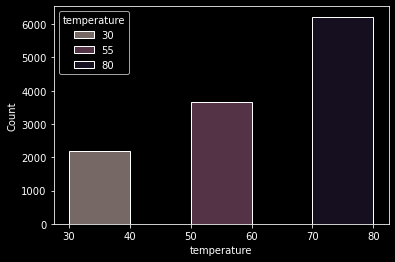

In [461]:
sns.histplot(data = df2, x = "temperature", bins = 5, hue = "temperature")

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [462]:
df2["Bar"].value_counts()

never    4934
less1    3394
1~3      2370
4~8      1054
gt8       327
Name: Bar, dtype: int64

In [464]:
bar_coupons = df2.query('coupon == "Bar"')
bar_coupons.sample(10)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9996,No Urgent Place,Alone,Snowy,30,2PM,Bar,1d,Female,36,Divorced,...,less1,1~3,less1,never,1,0,0,0,1,0
8710,Home,Alone,Sunny,80,6PM,Bar,2h,Male,31,Married partner,...,4~8,less1,4~8,less1,1,0,0,1,0,0
10062,No Urgent Place,Alone,Snowy,30,2PM,Bar,1d,Female,50plus,Single,...,1~3,less1,1~3,less1,1,0,0,0,1,0
7376,No Urgent Place,Friend(s),Rainy,55,10PM,Bar,2h,Male,below21,Unmarried partner,...,1~3,1~3,1~3,less1,1,1,0,0,1,0
1360,Home,Alone,Sunny,55,6PM,Bar,1d,Male,26,Unmarried partner,...,4~8,gt8,1~3,1~3,1,0,0,1,0,1
1139,Work,Alone,Sunny,55,7AM,Bar,1d,Female,36,Married partner,...,1~3,1~3,less1,less1,1,1,1,0,1,0
3714,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Female,50plus,Single,...,less1,1~3,1~3,1~3,1,0,0,0,1,0
7505,No Urgent Place,Kid(s),Snowy,30,6PM,Bar,1d,Female,41,Unmarried partner,...,1~3,1~3,4~8,less1,1,1,0,0,1,0
7255,Home,Alone,Sunny,80,6PM,Bar,2h,Male,50plus,Married partner,...,1~3,gt8,4~8,less1,1,0,0,1,0,0
2525,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Male,50plus,Married partner,...,4~8,4~8,gt8,gt8,1,1,0,0,1,1


2. What proportion of bar coupons were accepted?

41% of the bar coupons were accepted which is less than the overall coupon acceptance rate of 57%.

In [470]:
bar_coupons_accepted_percentage = bar_coupons.groupby("Y")["Y"].sum()[1] / bar_coupons.shape[0]
bar_coupons_accepted_percentage.round(2)

0.41

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.

The acceptance rate of "Bar coupons" for those who visited bars 3 or fewer times is 37% wheres those who went to bars more frequently accepted coupons 76% of times.

In [479]:
bar_coupons["Bar"].value_counts()

never    788
less1    553
1~3      379
4~8      147
gt8       46
Name: Bar, dtype: int64

In [480]:
bar_coupons_accepted = bar_coupons.groupby("Bar")[['Y']].agg(sum).reset_index()
bar_coupons_accepted

,Bar,Y
0,1~3,245
1,4~8,114
2,gt8,33
3,less1,247
4,never,149


In [481]:
bar_coupons_total = bar_coupons.groupby("Bar")[['Y']].count().reset_index()
bar_coupons_total

,Bar,Y
0,1~3,379
1,4~8,147
2,gt8,46
3,less1,553
4,never,788


In [482]:
bar_coupons_total_less_frequent = bar_coupons_total.iloc[[0,3,4],1].sum()
bar_coupons_total_frequent = bar_coupons_total.iloc[[1,2],1].sum()
bar_coupons_accept_group_less_frequent = bar_coupons_accepted.iloc[[0,3,4],1].sum()
bar_coupons_accept_group_frequent = bar_coupons_accepted.iloc[[1,2],1].sum()

In [485]:
bar_coupons_accept_rate_less_frequent = bar_coupons_accept_group_less_frequent / bar_coupons_total_less_frequent
bar_coupons_accept_rate_less_frequent.round(2)

0.37

In [486]:
bar_coupons_accept_rate_frequent = bar_coupons_accept_group_frequent / bar_coupons_total_frequent 
bar_coupons_accept_rate_frequent.round(2)

0.76

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?

For drivers over the age of 25, the "Bar coupon" acceptance rate is highest for individuals who visit bars 4-8 times at 79%. For drivers who visit bars over 8 times, the acceptance ratio drops to 68%. Perhaps these individuals go to specific bars and their choice of bar is not influenced by the coupon offers.  

In [507]:
#df2['age'] = pd.to_numeric(df2['age'], errors='coerce')
#df2.query('age > 40')["Bar"]

In [519]:
more_bar_visits = ["1~3", "4~8", "gt8"]
bar_coupons_1morevisit = bar_coupons.query('Bar  == @more_bar_visits')

In [521]:
bar_coupons_over_25_1morevisit = bar_coupons_1morevisit[bar_coupons_1morevisit['age'] > "25"]

In [522]:
bar_coupons_over_25_1morevisit_total = bar_coupons_over_25_1morevisit.groupby("Bar")[['Y']].count().reset_index()
bar_coupons_over_25_1morevisit_total

,Bar,Y
0,1~3,276
1,4~8,103
2,gt8,34


In [523]:
bar_coupons_over_25_1morevisit_accept = bar_coupons_over_25_1morevisit.groupby("Bar")[['Y']].sum().reset_index()
bar_coupons_over_25_1morevisit_accept

,Bar,Y
0,1~3,178
1,4~8,81
2,gt8,23


In [524]:
bar_coupons_over_25_1morevisit_total_accept = pd.merge(left = bar_coupons_over_25_1morevisit_total, right = bar_coupons_over_25_1morevisit_accept, on = "Bar", how = 'outer')

In [525]:
bar_coupons_over_25_1morevisit_total_accept

,Bar,Y_x,Y_y
0,1~3,276,178
1,4~8,103,81
2,gt8,34,23


In [526]:
bar_coupons_over_25_1morevisit_total_accept["Acceptance_ratio"] = (bar_coupons_over_25_1morevisit_total_accept['Y_y'] / bar_coupons_over_25_1morevisit_total_accept['Y_x']).round(2)

In [527]:
bar_coupons_over_25_1morevisit_total_accept

,Bar,Y_x,Y_y,Acceptance_ratio
0,1~3,276,178,0.64
1,4~8,103,81,0.79
2,gt8,34,23,0.68


In [652]:
px.bar(bar_coupons_over_25_1morevisit_total_accept, y = 'Acceptance_ratio', x = 'Bar', title = 'Coupon Acceptance Ratio vs Bar Visit Frequency', color = 'Bar')

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.

For drivers who visit bars more than once per month, had passengers that were not a kid and had occupations other than farming, fishing, or forestry, the acceptance raito is highest for the group that visits bars 4-8 times per month at 76%.

We can conclude that for "Bar coupons" age and bar visit frequency are the most important factors.

In [528]:
more_bar_visits = ["1~3", "4~8", "gt8"]

In [529]:
bar_coupons_1morevisit = bar_coupons.query('Bar  == @more_bar_visits')

In [530]:
passanger_no_kid = ["Alone", "Friend(s)", "Partner"]
occupations = ["Unemployed", "Computer & Mathematical", "Student", "Sales & Related", "Management & Administrative Support", "Education&Training&Library", "Arts Design Entertainment Sports & Media", "Business & Financial", "Community & Social Services", "Healthcare Practitioners & Technical", "Healthcare Support", "Food Preparation & Serving Related",
"Transportation & Material Moving", "Architecture & Engineering", "Legal", "Protective Service", "Construction & Extraction", "Life Physical Social Science", "Production Occupations", "Installation Maintenance & Repair", "Personal Care & Service", "Retired", "Building & Grounds Cleaning & Maintenance"]

In [531]:
bar_coupons_no_kid = bar_coupons_1morevisit.query('passanger == @passanger_no_kid')

In [532]:
bar_coupons_kid_in_occcupation = bar_coupons_no_kid.query('occupation == @occupations')

In [533]:
bar_coupons_kid_in_occcupation_accept = bar_coupons_kid_in_occcupation.groupby("Bar")[["Y"]].sum().reset_index()
bar_coupons_kid_in_occcupation_accept

,Bar,Y
0,1~3,200
1,4~8,82
2,gt8,29


In [534]:
bar_coupons_kid_in_occcupation_total = bar_coupons_kid_in_occcupation.groupby("Bar")[["Y"]].count().reset_index()
bar_coupons_kid_in_occcupation_total

,Bar,Y
0,1~3,299
1,4~8,108
2,gt8,41


In [535]:
bar_coupons_kid_in_occcupation_acceptrate = pd.merge(left = bar_coupons_kid_in_occcupation_total, right = bar_coupons_kid_in_occcupation_accept, on = "Bar")
bar_coupons_kid_in_occcupation_acceptrate

,Bar,Y_x,Y_y
0,1~3,299,200
1,4~8,108,82
2,gt8,41,29


In [536]:
bar_coupons_kid_in_occcupation_acceptrate["Acceptance_ratio"] = (bar_coupons_kid_in_occcupation_acceptrate["Y_y"] / bar_coupons_kid_in_occcupation_acceptrate["Y_x"]).round(2)
bar_coupons_kid_in_occcupation_acceptrate

,Bar,Y_x,Y_y,Acceptance_ratio
0,1~3,299,200,0.67
1,4~8,108,82,0.76
2,gt8,41,29,0.71


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*

Based on the marital status information provided in this dataset, there is not enough information to differentiate between the drivers who are widowed and not widowed.

- go to bars more than once a month and are under the age of 30 *OR*

The acceptance rate for drivers under 30 is highest for the group that visits bars more than 8 times per week is highest at 83%

- go to cheap restaurants more than 4 times a month and income is less than 50K.

For drivers whose annual income is less than 50k, and go to restruants that cost less than $20 frequently, acceptance ratios are close to the overall aceptance ratio of 57%. This indicates income is an important factor that acceptance ratios and needs further investigation.



In [559]:
# No widowed individuals in the dataset
bar_coupons['maritalStatus'].value_counts()

Married partner      833
Single               638
Unmarried partner    352
Divorced              73
Widowed               17
Name: maritalStatus, dtype: int64

In [ ]:
bar_coupons_under_30 = bar_coupons_1morevisit[bar_coupons_1morevisit['age'] < 30]

In [362]:
bar_coupons_under_30_accept = bar_coupons_under_30.groupby("Bar")[['Y']].sum().reset_index()
bar_coupons_under_30_accept

,Bar,Y
0,1~3,130
1,4~8,77
2,gt8,25


In [363]:
bar_coupons_under_30_total = bar_coupons_under_30.groupby("Bar")[['Y']].count().reset_index()
bar_coupons_under_30_total

,Bar,Y
0,1~3,192
1,4~8,96
2,gt8,30


In [365]:
bar_coupons_under_30_accept_rate = pd.merge(left = bar_coupons_under_30_total, right = bar_coupons_under_30_accept, on = "Bar")
bar_coupons_under_30_accept_rate

,Bar,Y_x,Y_y
0,1~3,192,130
1,4~8,96,77
2,gt8,30,25


In [375]:
bar_coupons_under_30_accept_rate["acceptance_ratio"] = bar_coupons_under_30_accept_rate["Y_y"] / bar_coupons_under_30_accept_rate["Y_x"] 

In [376]:
# go to bars more than once a month and are under the age of 30 OR
bar_coupons_under_30_accept_rate

,Bar,Y_x,Y_y,acceptance_raito,acceptance_ratio
0,1~3,192,130,0.677083,0.677083
1,4~8,96,77,0.802083,0.802083
2,gt8,30,25,0.833333,0.833333


In [ ]:
# go to cheap restaurants more than 4 times a month and income is less than 50K.

In [387]:
income_under_50 = ["Less than $12500", "$12500 - $24999", "$25000 - $37499", "$37500 - $49999"]

In [388]:
drivers_income_under_50 = data.query('income == @income_under_50')

In [395]:
drivers_income_under_50_freq_cheap_rest_visit = drivers_income_under_50.query('RestaurantLessThan20 == ["4~8", "gt8"]')

In [404]:
drivers_income_under_50_freq_cheap_rest_visit_total = drivers_income_under_50_freq_cheap_rest_visit.groupby('RestaurantLessThan20')[["Y"]].count()
drivers_income_under_50_freq_cheap_rest_visit_total

,Y
RestaurantLessThan20,
4~8,1149
gt8,474


In [405]:
drivers_income_under_50_freq_cheap_rest_visit_accept  = drivers_income_under_50_freq_cheap_rest_visit.groupby('RestaurantLessThan20')[["Y"]].sum()
drivers_income_under_50_freq_cheap_rest_visit_accept

,Y
RestaurantLessThan20,
4~8,683
gt8,309


In [407]:
drivers_income_under_50_freq_cheap_rest_visit_accept_rate = pd.merge(left = drivers_income_under_50_freq_cheap_rest_visit_total, right = drivers_income_under_50_freq_cheap_rest_visit_accept, on = "RestaurantLessThan20")
drivers_income_under_50_freq_cheap_rest_visit_accept_rate

,Y_x,Y_y
RestaurantLessThan20,,
4~8,1149,683
gt8,474,309


In [409]:
drivers_income_under_50_freq_cheap_rest_visit_accept_rate["acceptance_ratio"] = drivers_income_under_50_freq_cheap_rest_visit_accept_rate["Y_y"] / drivers_income_under_50_freq_cheap_rest_visit_accept_rate["Y_x"]
drivers_income_under_50_freq_cheap_rest_visit_accept_rate

,Y_x,Y_y,acceptance_ratio
RestaurantLessThan20,,,
4~8,1149,683,0.594430
gt8,474,309,0.651899


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

The acceptance rate of "Bar coupons" for those who visited bars 3 or fewer times is 37% wheres those who went to bars more frequently accepted coupons 76% of times.

For drivers over the age of 25, the "Bar coupon" acceptance rate is highest for individuals who visit bars 4-8 times at 79%. For drivers who visit bars over 8 times, the acceptance ratio drops to 68%. Perhaps these individuals go to specific bars and their choice of bar is not influenced by the coupon offers.  

For drivers who visit bars more than once per month, had passengers that were not a kid and had occupations other than farming, fishing, or forestry, the acceptance raito is highest for the group that visits bars 4-8 times per month at 76%.

We can conclude that for "Bar coupons" age and bar visit frequency are the important contributing factors towards acceptance ratios.

The acceptance rate for drivers under 30 is highest for the group that visits bars more than 8 times per week is highest at 83%

For drivers whose annual income is less than 50k, and go to restruants that cost less than $20 frequently, acceptance ratios are close to the overall aceptance ratio of 57%. This indicates income is an important factor that acceptance ratios and needs further investigation.



### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [579]:
df2["income"].value_counts()

$25000 - $37499     1919
$12500 - $24999     1728
$100000 or More     1692
$37500 - $49999     1689
$50000 - $62499     1565
Less than $12500    1014
$62500 - $74999      840
$87500 - $99999      818
$75000 - $87499      814
Name: income, dtype: int64

In [548]:
df2["coupon"].value_counts()

Coffee House             3816
Restaurant(<20)          2653
Carry out & Take away    2280
Bar                      1913
Restaurant(20-50)        1417
Name: coupon, dtype: int64

In [597]:
restaurant_expensive_coupons = df2.query('coupon == "Restaurant(20-50)"')

In [598]:
restaurant_expensive_coupons

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
36,Home,Alone,Sunny,55,6PM,Restaurant(20-50),1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
40,Work,Alone,Sunny,80,7AM,Restaurant(20-50),1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
58,Home,Alone,Sunny,55,6PM,Restaurant(20-50),1d,Male,46,Single,...,4~8,1~3,1~3,never,1,1,0,0,1,0
62,Work,Alone,Sunny,80,7AM,Restaurant(20-50),1d,Male,46,Single,...,4~8,1~3,1~3,never,1,1,0,0,1,0
80,Home,Alone,Sunny,55,6PM,Restaurant(20-50),1d,Male,46,Married partner,...,1~3,1~3,1~3,less1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12657,Home,Alone,Sunny,80,6PM,Restaurant(20-50),1d,Male,31,Married partner,...,never,4~8,gt8,less1,1,0,0,1,0,0
12661,Work,Alone,Sunny,80,7AM,Restaurant(20-50),2h,Male,31,Married partner,...,never,4~8,gt8,less1,1,0,0,1,0,0
12669,No Urgent Place,Partner,Sunny,30,10AM,Restaurant(20-50),1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12676,Home,Alone,Sunny,80,6PM,Restaurant(20-50),1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1


In [599]:
restaurant_expensive_coupons_total = restaurant_expensive_coupons.groupby('income')[["Y"]].count().reset_index()
restaurant_expensive_coupons_total

,income,Y
0,$100000 or More,201
1,$12500 - $24999,193
2,$25000 - $37499,213
3,$37500 - $49999,196
4,$50000 - $62499,194
5,$62500 - $74999,96
6,$75000 - $87499,102
7,$87500 - $99999,100
8,Less than $12500,122


In [600]:
restaurant_expensive_coupons_accept = restaurant_expensive_coupons.groupby('income')[["Y"]].sum().reset_index()
restaurant_expensive_coupons_accept

,income,Y
0,$100000 or More,101
1,$12500 - $24999,73
2,$25000 - $37499,112
3,$37500 - $49999,87
4,$50000 - $62499,95
5,$62500 - $74999,35
6,$75000 - $87499,47
7,$87500 - $99999,39
8,Less than $12500,43


In [602]:
restaurant_expensive_coupons_accept_rate = pd.merge(left = restaurant_expensive_coupons_total, right = restaurant_expensive_coupons_accept, on = "income")
restaurant_expensive_coupons_accept_rate


,income,Y_x,Y_y
0,$100000 or More,201,101
1,$12500 - $24999,193,73
2,$25000 - $37499,213,112
3,$37500 - $49999,196,87
4,$50000 - $62499,194,95
5,$62500 - $74999,96,35
6,$75000 - $87499,102,47
7,$87500 - $99999,100,39
8,Less than $12500,122,43


In [649]:
restaurant_expensive_coupons_accept_rate["income_accept_ratio"] = restaurant_expensive_coupons_accept_rate["Y_y"] / restaurant_expensive_coupons_accept_rate["Y_x"]
restaurant_expensive_coupons_accept_rate

,income,Y_x,Y_y,accept_ratio,income_accept_ratio
0,$100000 or More,201,101,0.502488,0.502488
1,$12500 - $24999,193,73,0.378238,0.378238
2,$25000 - $37499,213,112,0.525822,0.525822
3,$37500 - $49999,196,87,0.443878,0.443878
4,$50000 - $62499,194,95,0.489691,0.489691
5,$62500 - $74999,96,35,0.364583,0.364583
6,$75000 - $87499,102,47,0.460784,0.460784
7,$87500 - $99999,100,39,0.390000,0.390000
8,Less than $12500,122,43,0.352459,0.352459


In [650]:
px.bar(restaurant_expensive_coupons_accept_rate, y = 'income_accept_ratio', x = 'income', title = 'Coupon Acceptance Ratios by Income')

In [593]:
restaurant_expensive_coupons_total = restaurant_expensive_coupons.groupby('income')[["Y"]].count()
restaurant_expensive_coupons_total

,Y
income,
$100000 or More,201
$12500 - $24999,193
$25000 - $37499,213
$37500 - $49999,196
$50000 - $62499,194
$62500 - $74999,96
$75000 - $87499,102
$87500 - $99999,100
Less than $12500,122


In [611]:
weather_all = df2.groupby('weather')[["Y"]].agg('count').reset_index()
weather_all

,weather,Y
0,Rainy,1147
1,Snowy,1331
2,Sunny,9601


In [612]:
weather_accept = df2.groupby('weather')[['Y']].sum().reset_index()
weather_accept

,weather,Y
0,Rainy,530
1,Snowy,634
2,Sunny,5713


In [614]:
acceptance_by_weather = pd.merge(left = weather_all, right = weather_accept, on = 'weather')
acceptance_by_weather

,weather,Y_x,Y_y
0,Rainy,1147,530
1,Snowy,1331,634
2,Sunny,9601,5713


In [616]:
acceptance_by_weather["wx_accept_ratio"] = acceptance_by_weather["Y_y"] / acceptance_by_weather["Y_x"]
acceptance_by_weather

,weather,Y_x,Y_y,wx_accept_ratio
0,Rainy,1147,530,0.462075
1,Snowy,1331,634,0.476334
2,Sunny,9601,5713,0.595042


In [620]:
px.bar(acceptance_by_weather, y = 'wx_accept_ratio', x = 'weather', title = 'Coupon Acceptance Ratios by Weather')

In [621]:
df2['destination'].value_counts()

No Urgent Place    5970
Home               3085
Work               3024
Name: destination, dtype: int64

In [624]:
destination_total = df2.groupby('destination')[['Y']].count().reset_index()
destination_total

,destination,Y
0,Home,3085
1,No Urgent Place,5970
2,Work,3024


In [625]:
destination_accept = df2.groupby('destination')[['Y']].sum().reset_index()
destination_accept

,destination,Y
0,Home,1568
1,No Urgent Place,3785
2,Work,1524


In [626]:
destination_total_accept = pd.merge(destination_total, destination_accept, on = "destination")
destination_total_accept

,destination,Y_x,Y_y
0,Home,3085,1568
1,No Urgent Place,5970,3785
2,Work,3024,1524


In [629]:
destination_total_accept["des_accept_ratio"] = destination_total_accept["Y_y"] / destination_total_accept["Y_x"]
destination_total_accept

,destination,Y_x,Y_y,des_accept_ratio
0,Home,3085,1568,0.508266
1,No Urgent Place,5970,3785,0.634003
2,Work,3024,1524,0.503968


In [631]:
px.bar(destination_total_accept, y = 'des_accept_ratio', x = 'destination', title = 'Coupon Acceptance Ratios by Destination', color = 'destination')

In [633]:
df2['expiration'].value_counts()

1d    6760
2h    5319
Name: expiration, dtype: int64

Summary:

Drivers with higher incomes have higher coupon acceptance ratios for expensive restaurants. For drivers with income greater than 100k, acceptance ratio exceeds 50%. 

Weather also explains a substancial part of variance in overall acceptance ratio. Days with sunny weather tend to have 12-13% higher acceptance ratio compared to foul weather days.

Another factor that determines acceptance ratio among drivers is the destination they are heading to. If the drivers are enroute to work or home, the acceptance ratio tends to be around 50%, however when drivers are not going to a particular destination, the acceptance ratio jumps to 63.4%. This shows that greater acceptance ratio can be achieved by targeting coupons to drivers who are not on their way to work or home.



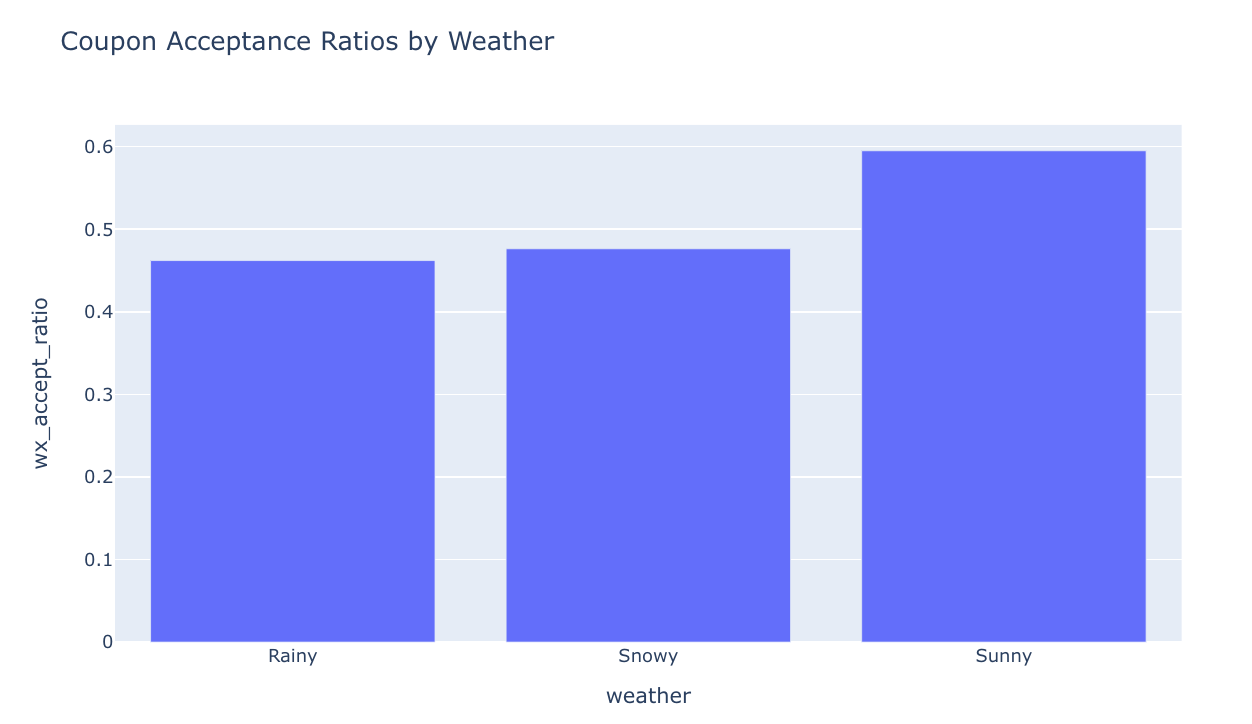


